In [7]:

import models 
import sklearn 
import os
import matplotlib
import matplotlib.pyplot as plt 
import feature_extraction
from sklearn.model_selection import cross_val_score
import numpy as np
import torch
import models
from models import train_test_split
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from sklearn.decomposition import PCA
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras import backend as K



In [9]:
seq_length = 178

#history = keras.callbacks.History()

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optim = keras.optimizers.SGD(lr=0.01, decay=0.0, momentum=0.0, nesterov=True)

model.compile(loss='binary_crossentropy',
              optimizer=optim,
              metrics=['acc'])


data, labels, name_list = feature_extraction.raw_data(two_cat = True)

def precision(y_true, y_pred):
    """Precision metric.
     Only computes a batch-wise average of precision.
     Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = np.sum(np.round(np.clip(y_true * y_pred, 0, 1)))
    predicted_positives = np.sum(np.round(np.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + 1e-07)
    return precision


    
X_train, X_test, y_train, y_test = train_test_split(data, labels, name_list, test_size = 0.2)


X_train = X_train[:,np.newaxis,:]
X_train = np.swapaxes(X_train, 1, 2)

X_test = X_test[:,np.newaxis,:]
X_test = np.swapaxes(X_test, 1, 2)

history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_split=0.1)
score = model.evaluate(X_test, y_test, batch_size=16)
print(score)
prec = precision(y_test, model.predict(X_test))
print(prec)


#from keras.utils import plot_model
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Train on 8280 samples, validate on 920 samples
Epoch 1/20
8280/8280 [==============================] - 5s 658us/step - loss: 0.4879 - acc: 0.8698 - val_loss: 0.2984 - val_acc: 0.9152
Epoch 2/20
8280/8280 [==============================] - 5s 593us/step - loss: 0.2376 - acc: 0.9471 - val_loss: 0.1631 - val_acc: 0.9707
Epoch 3/20
8280/8280 [==============================] - 5s 591us/step - loss: 0.1635 - acc: 0.9574 - val_loss: 0.1179 - val_acc: 0.9652
Epoch 4/20
8280/8280 [==============================] - 5s 589us/step - loss: 0.1313 - acc: 0.9649 - val_loss: 0.0963 - val_acc: 0.9728
Epoch 5/20
8280/8280 [==============================] - 5s 601us/step - loss: 0.1090 - acc: 0.9664 - val_loss: 0.0751 - val_acc: 0.9804
Epoch 6/20
8280/8280 [==============================] - 5s 594us/step - loss: 0.0946 - acc: 0.9691 - val_loss: 0.0765 - val_acc: 0.9685
Epoch 7/20
8280/8280 [==============================] - 5s 594us/step - loss: 0.0838 - acc: 0.9743 - val_loss: 0.0621 - val_acc: 0.9739
E

InvocationException: GraphViz's executables not found

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('CNN ROC')
plt.close()

print(history.history)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Training and Validation Loss')
plt.close()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Training and Validation Accuracy')
plt.close()

2300/2300 [==============================] - 0s 208us/step
[0.05635682603182352, 0.9847826086956522]
0.20360316


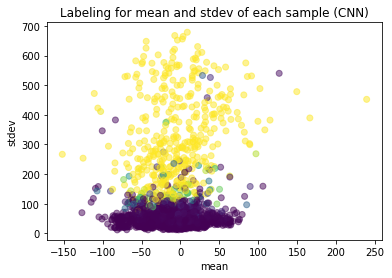

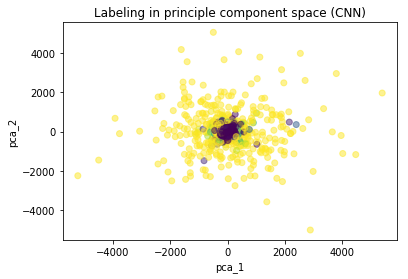

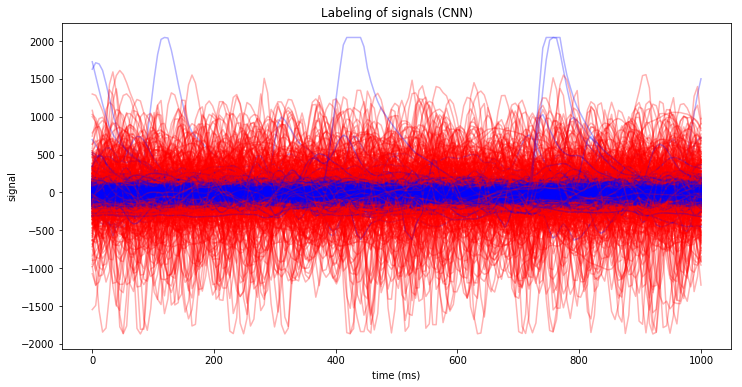

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, name_list, test_size = 0.2)

X_test2 = X_test[:,np.newaxis,:]
X_test2 = np.swapaxes(X_test2, 1, 2)

score = model.evaluate(X_test2, y_test, batch_size=16)
print(score)

labels_predict =  model.predict(X_test2)
labels_predict = labels_predict.reshape((-1,))

a  = np.arange(3)        # a.shape  = (3,)
b  = a.reshape((3,1))    # b.shape  = (3,1)
b2 = a.reshape((-1,1))   # b2.shape = (3,1)
c  = b.reshape((3,))     # c.shape  = (3,)
c2 = b.reshape((-1,))    # c2.shape = (3,)

print(np.mean(labels_predict))

pca = PCA()

#X_train, X_test, y_train, y_test = train_test_split(data, labels, name_list, test_size = 0.2)

data_pca = pca.fit_transform(X_test)

avges = np.mean(X_test,axis=1)
sigs = np.std(X_test,axis=1)

plt.figure()
plt.scatter(avges,sigs,alpha=0.5,c=labels_predict)
plt.xlabel('mean')
plt.ylabel('stdev')
plt.title('Labeling for mean and stdev of each sample (CNN)')
plt.savefig('Labeling for mean and stdev of each sample (CNN)')
plt.show()

plt.figure()
plt.scatter(data_pca[:,0],data_pca[:,1],alpha=0.5,c=labels_predict)
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('Labeling in principle component space (CNN)')
plt.show()

# now, plot the curves
t = np.linspace(0,1000,X_test.shape[1])
plt.figure(figsize=(12,6))
for i in range(X_test.shape[0]) :
    #print(labels_predict[i])
    if labels_predict[i] > 0.5 :
        plt.plot(t,X_test[i,:],'-r',alpha=0.3)
    else :
        plt.plot(t,X_test[i,:],'-b',alpha=0.3)
        #print('blue')

plt.xlabel('time (ms)')
plt.ylabel('signal')
plt.title('Labeling of signals (CNN)')
plt.savefig('Labeling of signals (CNN)')
plt.show()